In [2]:
import pandas as pd
data = pd.read_csv('diamonds.csv')
data.head(5)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
#查看缺失值列
na_records = data.isnull().any(axis=0) #
print(na_records.sum()) #空值的总记录数
print(na_records[na_records]==True) #
#没有缺少值,不需要处理

0
Series([], dtype: bool)


In [5]:
#异常值处理
import numpy as np
def process_outlier(sub_data,each_col):  #定义该函数用来判断每列是否异常，并将异常列填充为均值
    _mean = sub_data[each_col].mean()  
    _std = sub_data[each_col].std()  #这两列求出该列的均值和标准差
    scope_min,scope_max = _mean-3*_std,_mean+3*_std  #通过均值+-3个标准差来计算正常数据分布的最小值和最大值
    is_outlier = (sub_data[each_col] <scope_min)|(sub_data[each_col] >scope_max)  #判断是否异常的条件，当该列内的数据小于正常分布的最小值或大于最大数值时标记True否则标记False
    sub_data[is_outlier] = _mean  #将异常的数据填充为均值
    print(np.sum(is_outlier))  #打印异常记录的数量
    return sub_data

In [6]:
data['price']=process_outlier(data[['price']],'price')

1206


C:\Users\周永都\AppData\Local\Temp\ipykernel_20504\451567696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值


In [7]:
data['carat']=process_outlier(data[['carat']],'carat')

439


C:\Users\周永都\AppData\Local\Temp\ipykernel_20504\451567696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值
C:\Users\周永都\AppData\Local\Temp\ipykernel_20504\451567696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值


In [8]:
#查看重复值
data[data.duplicated()]


,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919.0,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093.0,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203.0,5.19,5.17,3.17


In [9]:
data = data.drop_duplicates()       

In [10]:
#[53940 rows x 10 columns] 去除之前
#[53789 rows x 10 columns] 去除之后
print(data) 

       carat        cut color clarity  depth  table   price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53789 rows x 10 columns]


In [11]:
#标准化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss_model = StandardScaler()
data['price'] = ss_model.fit_transform(data[['price']])
print(data[['price']].describe().T.round(5))

         count  mean      std      min      25%     50%      75%      max
price  53789.0   0.0  1.00001 -0.96228 -0.78054 -0.3589  0.39859  3.56583


In [12]:
#二元化
from sklearn.preprocessing import Binarizer
bin_model = Binarizer(threshold=data['price'].mean())
data['price_bin'] = bin_model.fit_transform(data[['price']])
print(data['price_bin'].head(5))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: price_bin, dtype: float64


In [21]:
#离散化
data["price_bin"] = pd.cut(data["price"],4,labels=["bad", "medium", "good" ,"awesome"])
print(data["price_bin"].head(3))

0    bad
1    bad
2    bad
Name: price_bin, dtype: category
Categories (4, object): ['bad' < 'medium' < 'good' < 'awesome']


In [14]:
#OneHotEncode转换
#用cut进行一个分类，然后用1去代表这列所显示的
object_data=data[['cut']]
convert_data=pd.get_dummies(object_data)
print(convert_data.head(5))


   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good
0         0         0          1            0              0
1         0         0          0            1              0
2         0         1          0            0              0
3         0         0          0            1              0
4         0         1          0            0              0


In [15]:
#导入相关的绘图库
import  matplotlib.pyplot as  plt
plt.rc("font",family="SimHei",size="14")
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import  numpy as  np
%matplotlib inline
%config InlineBackend.figure_format='retina'

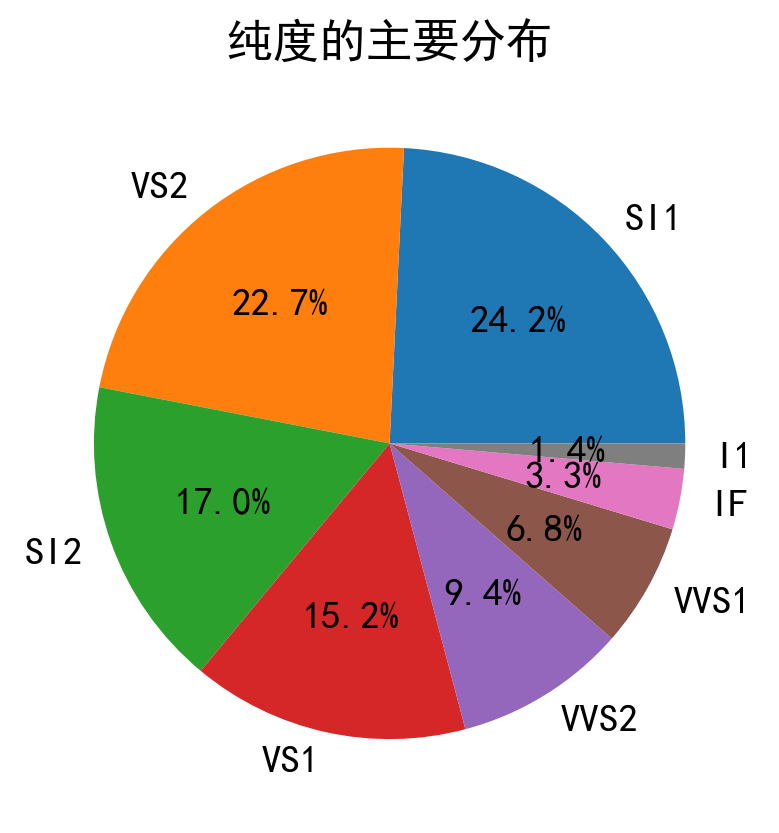

In [16]:
#饼图
# 总结：对比得出纯度主要分布在 VS2、SI1、SI2、VS1
plt.pie(x=data['clarity'].value_counts(),labels=data['clarity'].value_counts().index,autopct='%.1f%%',)
plt.title(u'纯度的主要分布')
plt. show()

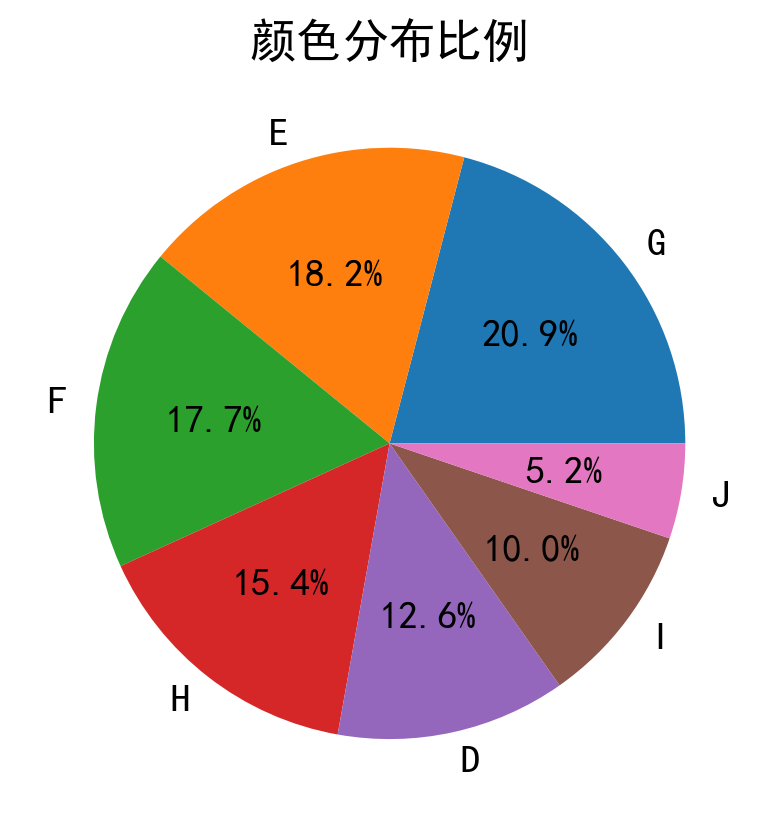

In [17]:
#饼图
#总结：对比得出在颜色分布比例中 color中G的占比最大，J最小
plt.pie(x=data['color'].value_counts(),labels=data['color'].value_counts().index,autopct='%2.1f%%',)
plt.title(u'颜色分布比例')
plt. show()

In [19]:
#总结：通过柱形图对砖石颜色的统计,分布在G颜色的数量最多，i颜色的数量最小。
import seaborn as sns
sns.countplot(data.color)

ValueError: could not convert string to float: 'E'

<AxesSubplot: title={'center': '重量和深度之间关系'}, xlabel='depth', ylabel='carat'>

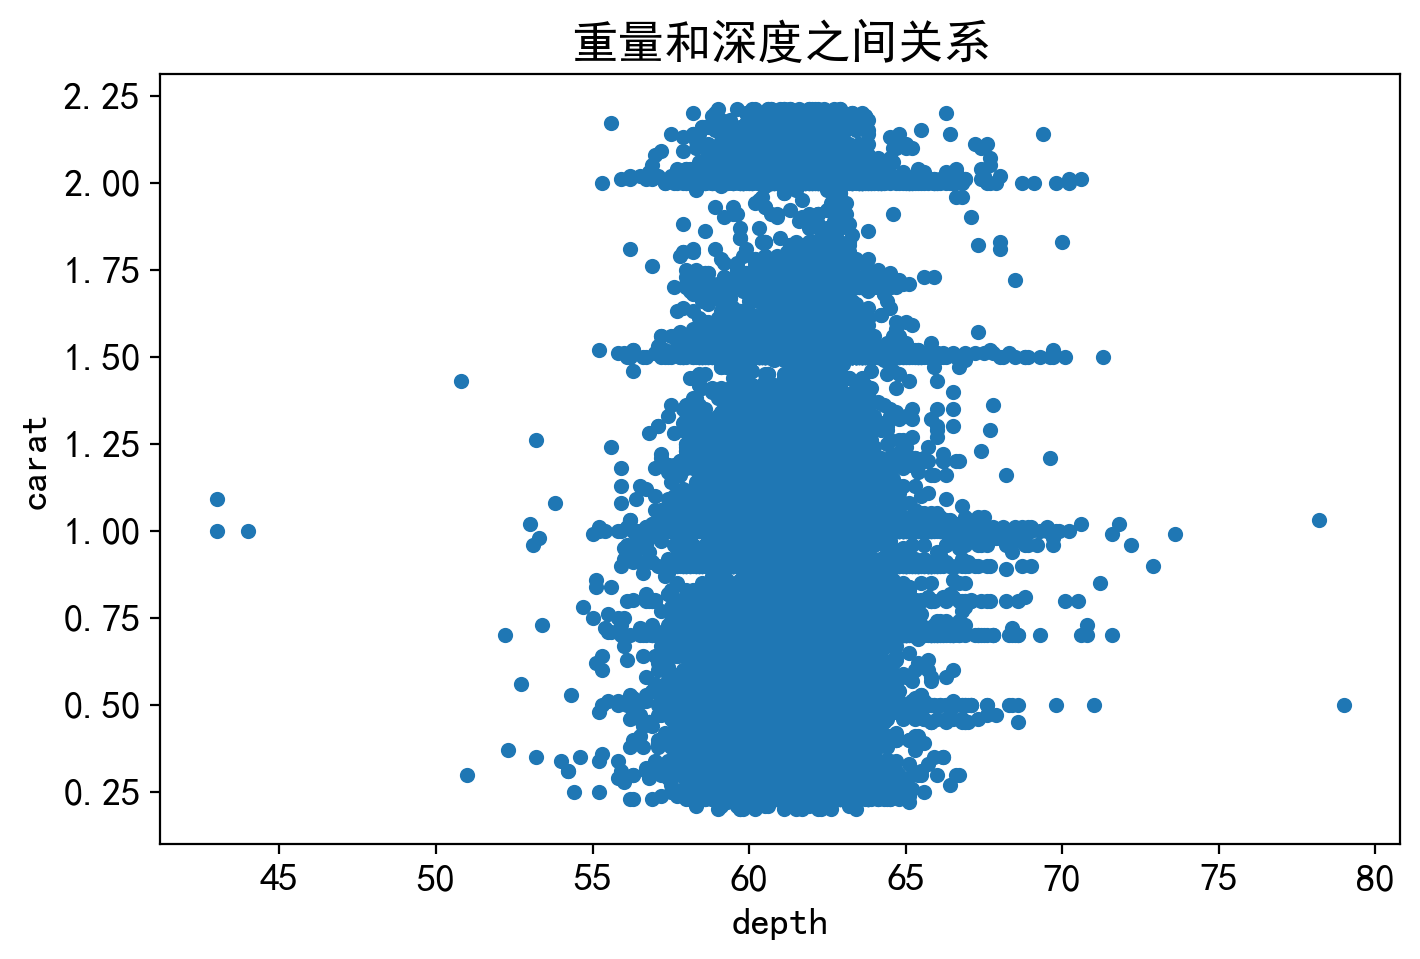

In [20]:
#总结：对比得出主要分布在60-65深度的砖石呈现出不一样的重量
data.plot(kind='scatter',x='depth',y='carat',figsize=(8,5),title='重量和深度之间关系')